In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('train.csv',encoding='latin1')
data.columns=['Target','Id','Date','Query','User','Text']

In [3]:
data.head()

,Target,Id,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
print(np.shape(data))

(1599999, 6)


In [5]:
x=data['Text'].values
y=data['Target'].values

In [6]:
data.columns

Index(['Target', 'Id', 'Date', 'Query', 'User', 'Text'], dtype='object')

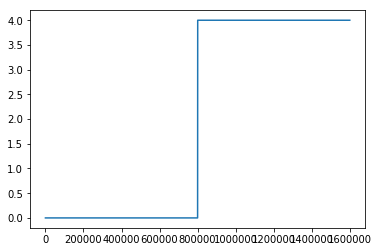

In [7]:
plt.plot(y)

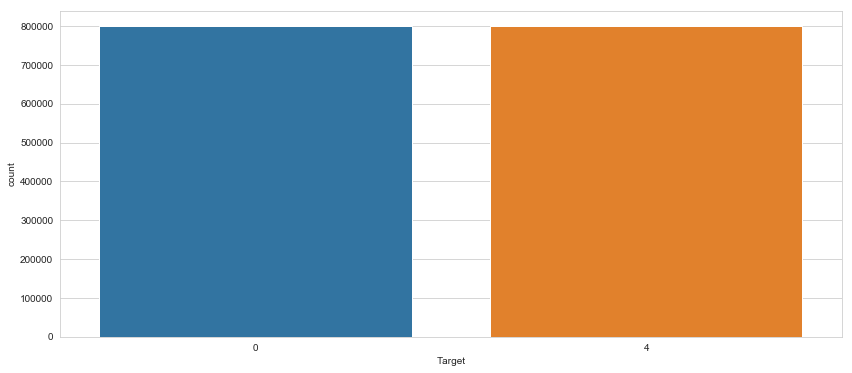

In [8]:
#from matplotlib import *
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
sns.countplot(x='Target',data=data)
#ax.set_xticklabels(ax.get_xticklabels(),fontsize=7)
#ax.tight_layout()

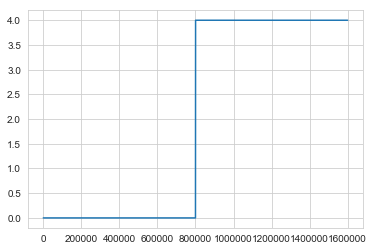

In [9]:
plt.plot(y)

In [10]:
print(type(x))

<class 'numpy.ndarray'>


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
print(np.shape(x_train),np.shape(x_test),np.shape(y_train),np.shape(y_test))

(1119999,) (480000,) (1119999,) (480000,)


In [14]:
print(type(x_train))

<class 'numpy.ndarray'>


### Converting Text data into vectorizer 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit_transform(x_train)
X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)
X_train

<1119999x538286 sparse matrix of type '<class 'numpy.int64'>'
	with 13294042 stored elements in Compressed Sparse Row format>

In [16]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7991416666666666


### Predicting with Traindata & Testdata

In [23]:
n=10000
print(y_test[n])
classifier.predict(X_test[n])

0


array([0], dtype=int64)

###  Own Statement Predicting data
positive and negative Statement

In [25]:
sent1=np.array(['we willnot work very hard'])
#sent=np.array(['someone committed suicide'])
st=vectorizer.transform(sent1)
result=classifier.predict(st)
import pyautogui
if result[0]==0:
    pyautogui.alert("It is a Sad statement")
else:
    pyautogui.alert("It is a happy statement")

In [19]:
st=vectorizer.transform(sent)
result=classifier.predict(st)

In [38]:
print(result)

[0]


In [39]:
import pyautogui
if result[0]==0:
    pyautogui.alert("I am Sad")
else:
    pyautogui.alert("I am happy")

4
